## 1: Create a Synthetic Dataset

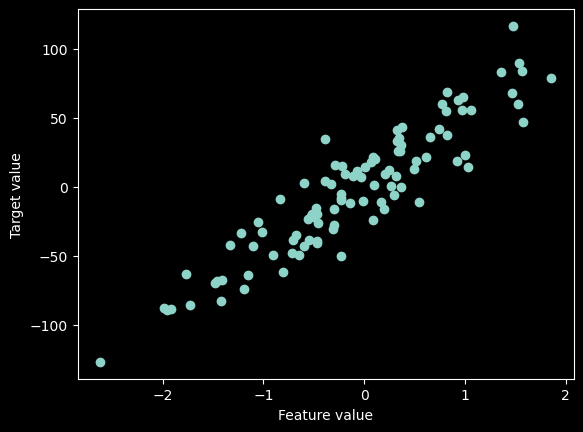

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_regression  # this is the way: datasets.make_regression

# Create a simple regression problem with one feature
X, y, coef = make_regression(n_samples=100, n_features=1, noise=20, random_state=42, coef=True)

# Plot the data
plt.scatter(X, y, marker='o')
plt.xlabel('Feature value')
plt.ylabel('Target value')
plt.show()

## 2: Split the Data into Training and Test Sets

Usually there's the preprocessing step: check for missing values and handle them (dropna or fillna with the mean or mode) 

In [9]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=20)

## 3: Train the Model

In [10]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression()

## 4: Make Predictions and Evaluate the Model

### RMSE vs R-Squared?

**RMSE** measures the average magnitude of the residuals or prediction errors. It gives you a sense of how much error there is between two datasets. In other words, it tells you how concentrated the data is around the line of best fit. Lower values of RMSE indicate better fit.

On the other hand, **R-squared** (also known as the coefficient of determination) measures the proportion of the variance in the dependent variable that is predictable from the independent variable(s). It provides a measure of how well the regression predictions approximate the real data points. An R-squared of 100 percent indicates that all changes in the dependent variable are completely explained by changes in the independent variable(s).

In [14]:
from sklearn.metrics import r2_score

print("The model performance for training set")
print('R2 score is {}'.format(r2_score(y_train, y_train_predict)))

print("The model performance for testing set")
print('R2 score is {}'.format(r2_score(y_test, y_test_predict)))

The model performance for training set
R2 score is 0.8560161341205401
The model performance for testing set
R2 score is 0.7761612270436113


In [11]:
from sklearn.metrics import mean_squared_error

y_train_predict = lr.predict(X_train)

# model evaluation for training set
rmse = (np.sqrt(mean_squared_error(y_train, y_train_predict)))
print("The model performance for training set")
print('RMSE is {}'.format(rmse))
print("\n")

# model evaluation for testing set
y_test_predict = lr.predict(X_test)
rmse = (np.sqrt(mean_squared_error(y_test, y_test_predict)))
print("The model performance for testing set")
print('RMSE is {}'.format(rmse))

The model performance for training set
RMSE is 18.17166301583121


The model performance for testing set
RMSE is 15.864189949847772


The Mean Squared Error (MSE) is another metric used to evaluate the performance of a regression model. It represents the average of the squared differences between the actual and predicted values. 

Similar to RMSE, a lower value of MSE indicates a better fit of the model to the data. However, unlike RMSE, the units of MSE aren't the same as the units of the target variable because the differences are squared.

One of the main reasons to use MSE is that, by squaring the residuals, we give more weight to larger residuals. This means that **MSE is more useful** when large errors are particularly undesirable.

In [15]:
from sklearn.metrics import mean_squared_error

print("The model performance for training set")
print('MSE is {}'.format(mean_squared_error(y_train, y_train_predict)))

print("The model performance for testing set")
print('MSE is {}'.format(mean_squared_error(y_test, y_test_predict)))

The model performance for training set
MSE is 330.20933676092784
The model performance for testing set
MSE is 251.67252276485107


## 4. Visualise the fitted model

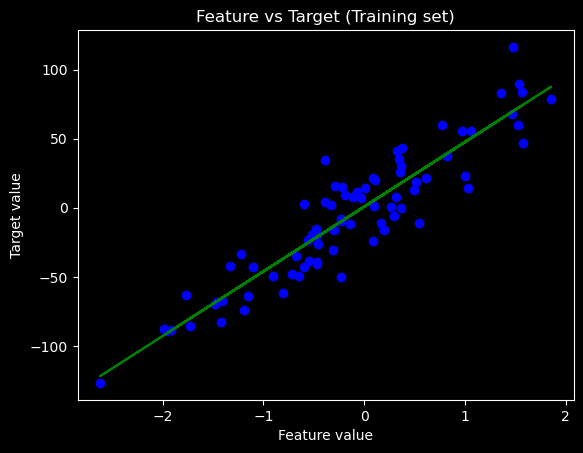

In [12]:
plt.scatter(X_train, y_train, color = "blue")
plt.plot(X_train, y_train_predict, color = "green")
plt.xlabel('Feature value')
plt.ylabel('Target value')
plt.title('Feature vs Target (Training set)')
plt.show()

# Again: an auto generated example with sklearn

In [33]:
from sklearn.datasets import make_regression

X, y, coef = make_regression(n_features=1, noise=20, coef=True)

X.shape

(100, 1)

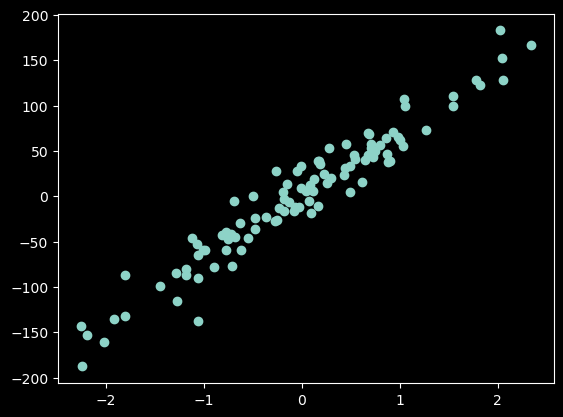

In [34]:
import matplotlib.pylab as plt

plt.scatter(X,y)

In [35]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y) # note that we first do both Xs, then both ys

y_train.shape

(75,)

In [36]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression()

In [37]:
from sklearn.metrics import mean_squared_error

y_pred = lr.predict(X_test)

In [38]:
from sklearn.metrics import r2_score

r2_score(y_test, y_pred)

0.9141639013775038

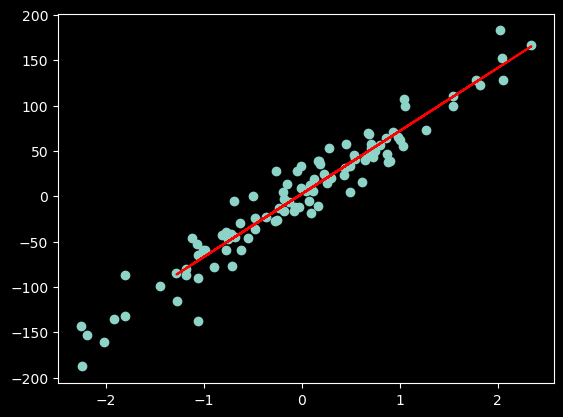

In [40]:
plt.scatter(X,y)
plt.plot(X_test, y_pred, 'r-')

# Again: the tips dataset

loaded from seaborn

In [21]:
# Import necessary libraries
import seaborn as sns
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Load the dataset
tips = sns.load_dataset('tips')

# Show the first few rows of the dataset
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [3]:
tips.dtypes

total_bill     float64
tip            float64
sex           category
smoker        category
day           category
time          category
size             int64
dtype: object

## preprocessing

### Encoding categorical data

In [23]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

for col in tips.columns:
    if tips[col].dtype == 'category':
        tips[col] = le.fit_transform(tips[col])

**Learning: this can treat category data as numerical down the line.**

Better to use one-hot encoding with pandas' get_dummies() function
```python
df_encoded = pd.get_dummies(tips, columns=['day', 'sex', 'smoker', 'time'])
```

Alternatively:

In [25]:
from sklearn.preprocessing import OneHotEncoder

# Specify the categorical columns to be one-hot encoded
categorical_cols = ['sex', 'smoker', 'day', 'time']

# Initialize the OneHotEncoder
one_hot_encoder = OneHotEncoder(drop='first') # drop='first' to avoid dummy variable trap

# Fit and transform the data
one_hot_encoded = one_hot_encoder.fit_transform(tips[categorical_cols])
df_encoded = pd.DataFrame(one_hot_encoded.toarray(), columns=one_hot_encoder.get_feature_names_out(categorical_cols))

# Drop the original categorical columns from the dataset
tips_dropped = tips.drop(categorical_cols, axis=1)

# Join the encoded DataFrame with the original DataFrame
df_final = pd.concat([tips_dropped, df_encoded], axis=1)


In [26]:
tips.describe().T

,count,mean,std,min,25%,50%,75%,max
total_bill,244.0,19.785943,8.902412,3.07,13.3475,17.795,24.1275,50.81
tip,244.0,2.998279,1.383638,1.00,2.0000,2.900,3.5625,10.00
sex,244.0,0.643443,0.479967,0.00,0.0000,1.000,1.0000,1.00
smoker,244.0,0.381148,0.486667,0.00,0.0000,0.000,1.0000,1.00
day,244.0,1.741803,0.926815,0.00,1.0000,2.000,3.0000,3.00
time,244.0,0.278689,0.449276,0.00,0.0000,0.000,1.0000,1.00
size,244.0,2.569672,0.951100,1.00,2.0000,2.000,3.0000,6.00


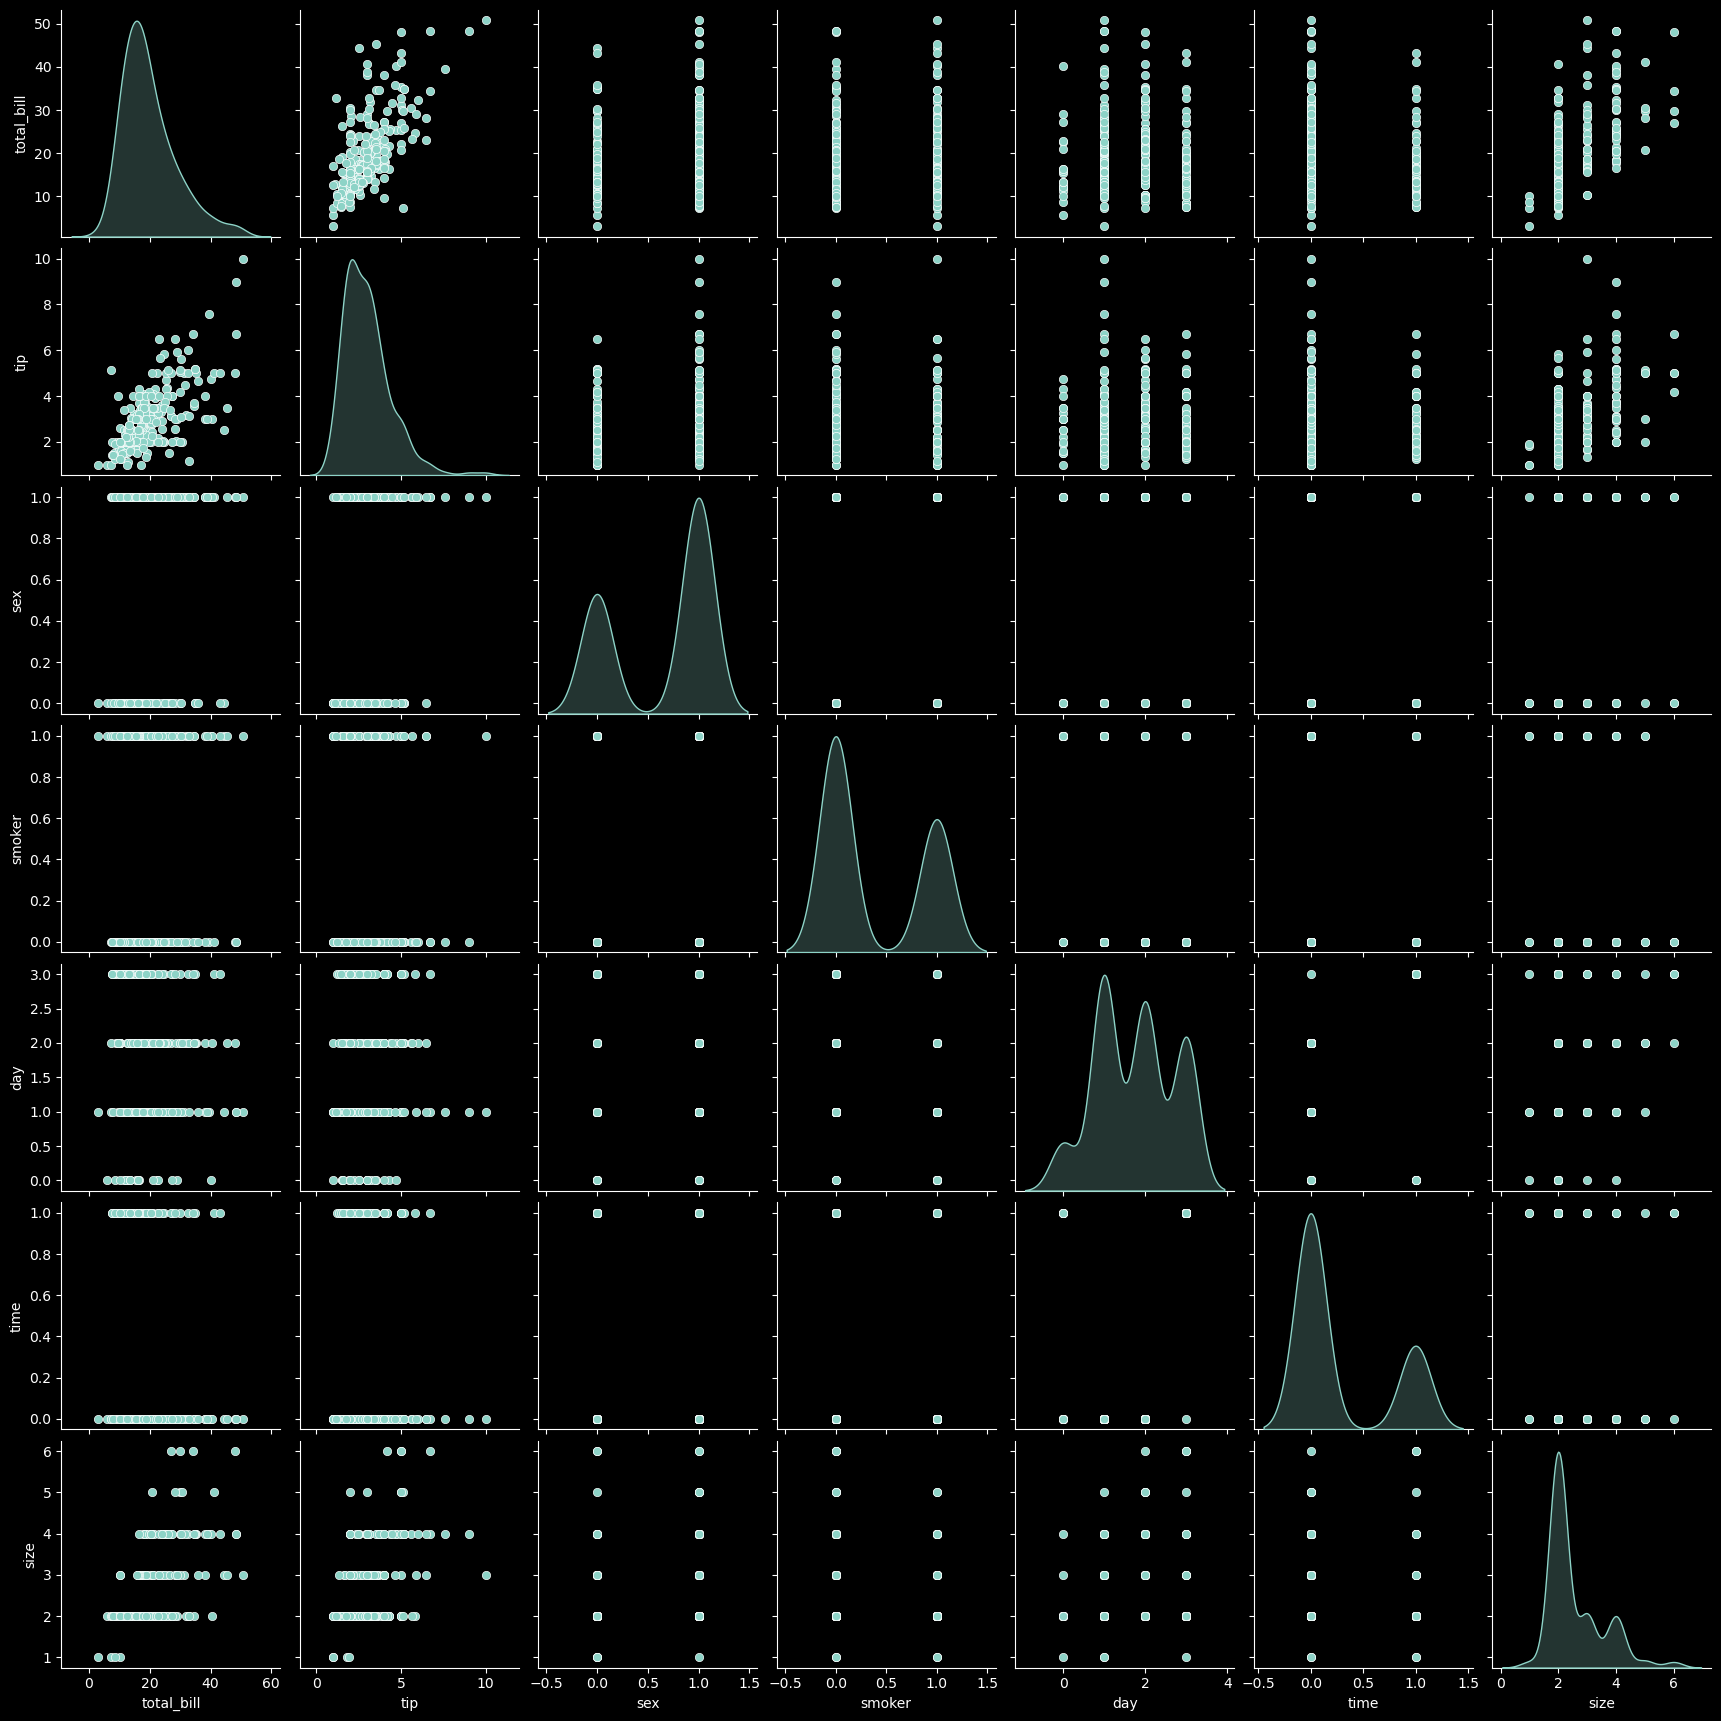

In [27]:
sns.pairplot(tips, diag_kind='kde')

To explore dependent variables, this is a good plot

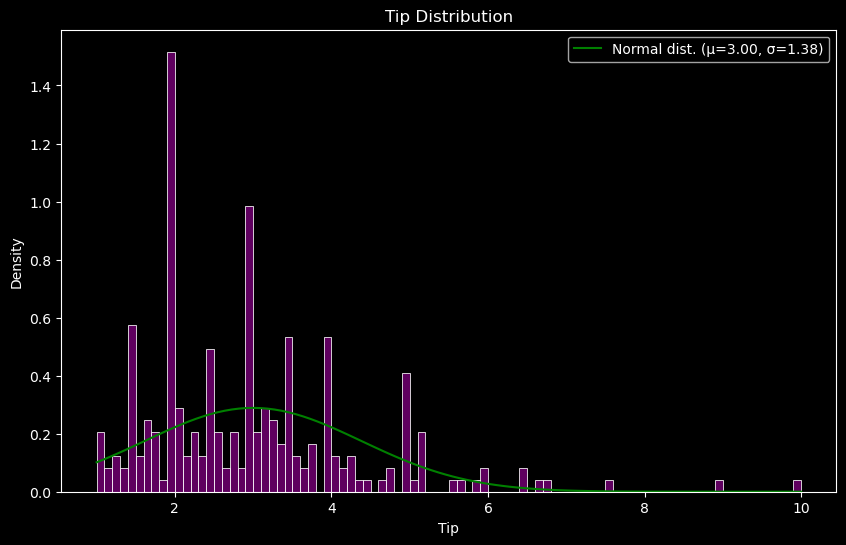

In [120]:
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats
import numpy as np

# Fit a normal distribution to the 'tip' data
mu, sigma = stats.norm.fit(tips['tip'])

# Create a histogram of the 'tip' column
plt.figure(figsize=(10, 6))
sns.histplot(tips['tip'], stat='density', binwidth=0.1,  color='purple')
# plt.ylim(0, 0.4)

# Calculate the normal distribution based on the fitted parameters
x_norm = np.linspace(tips['tip'].min(), tips['tip'].max(), 100)
y_norm = stats.norm.pdf(x_norm, mu, sigma)

# Plot the normal distribution overlay
plt.plot(x_norm, y_norm, color="green", label=f"Normal dist. (μ={mu:.2f}, σ={sigma:.2f})")
plt.title("Tip Distribution")
plt.xlabel("Tip")
plt.ylabel("Density")
plt.legend()

plt.show()

The Quantile-Quantile (Q-Q) plot is a tool that helps  assess if a dataset follows a certain theoretical distribution. Red is normal, the dots are the tips. 
- On the x-axis, we plot the quantiles from the theoretical distribution.
- On the y-axis, we plot the quantiles from the actual data.

if your dataset is perfectly normally distributed, the Q-Q plot would be a straight line at 45 degrees.

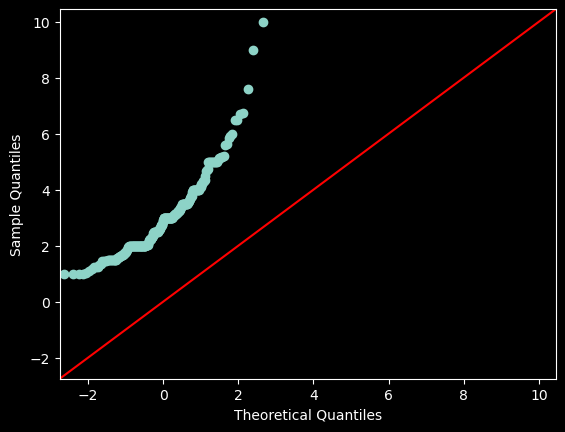

In [121]:
import statsmodels.api as sm
import matplotlib.pyplot as plt

sm.qqplot(tips['tip'], line='45')
plt.show()

## Check for missing data:

In [ ]:
tips.isnull().sum()

total_bill    0
tip           0
sex           0
smoker        0
day           0
time          0
size          0
dtype: int64

Good to know: sklearn has `simpleImputer` amoung its `imputers` which takes the argument `simpleImputer(strategy='mean')`

The alternative is dropna or fillna.

It is common to use `sklearn.pipeline` to sequence multiple data preprocessing steps and model training into a single process. It allows joint parameter selection: You can grid search over parameters of all estimators in the pipeline at once.

In [28]:
from sklearn.model_selection import train_test_split

X = tips.drop('tip', axis=1)    # to drop the column I'm comparing with, these are now the features
y = tips['tip']                 # while this is the target

X_train, X_test, y_train, y_test = train_test_split(X,y)

In [29]:
y_train.dtype # weird, X_train is a df

dtype('float64')

In [30]:
# anyway, I need to scale it first

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train,y_train)   # fit immediately trains it
X_test_scaled = scaler.transform(X_test)

Good to know: in the case of fit_transform(), the "fit" part is about **learning the transformation parameters from the data,** and the "transform" part is about applying the learned transformation to the data.

This is distinct from the "fit" used in the context of model.fit(), where it refers to **learning the parameters of the machine learning model** using the training data.

In [ ]:
X_train_scaled.shape

(183, 6)

In [34]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()

lr.fit(X_train_scaled, y_train)

LinearRegression()

In [37]:
lr.coef_

array([ 7.50099370e-01,  1.22248918e-02,  4.60158840e-04,  1.50808455e-02,
       -1.20296094e-02,  2.39189798e-01])

In [38]:
lr.intercept_

2.94191256830601

In [47]:
from sklearn.metrics import r2_score

y_pred = lr.predict(X_train_scaled)

r2_score(y_train, y_pred)       # compare the actual `y` values with your predicted `y` values 

0.47737182540310064

In [43]:
# R squared is a method in most models, so no need to do predict() and then call it 

lr.score(X_train_scaled, y_train)

0.47737182540310064

In [44]:
lr.score(X_test_scaled, y_test)

0.42661077534978453

In [ ]:
tips.columns

Index(['total_bill', 'tip', 'sex', 'smoker', 'day', 'time', 'size'], dtype='object')

In [59]:
features = tips.columns.tolist() # to change a pandas index object into a list
features.remove('tip')
features

['total_bill', 'sex', 'smoker', 'day', 'time', 'size']

In [50]:
coefs = lr.coef_.tolist()

In [60]:
[(i,j) for i,j in zip(coefs,features)] # equivalent to `list(zip(coefs, features))` as zip is an iterator

[(0.7500993704161258, 'total_bill'),
 (0.01222489178759441, 'sex'),
 (0.00046015884015611705, 'smoker'),
 (0.015080845482176305, 'day'),
 (-0.012029609361181758, 'time'),
 (0.23918979844698265, 'size')]

To visualise some of the relations, try lmplot:

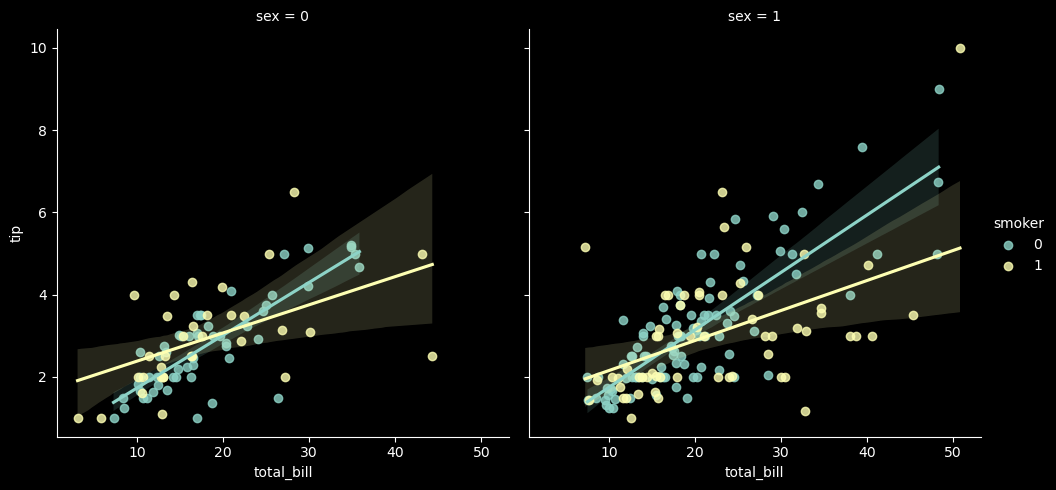

In [ ]:
sns.lmplot(data=tips, x="total_bill", y="tip", col="sex", hue="smoker")

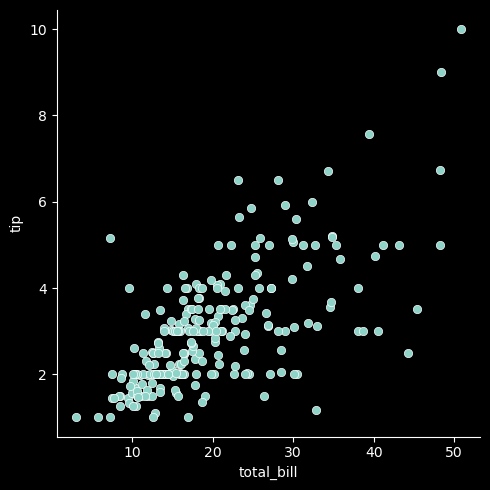

In [ ]:
sns.relplot(data=tips, x='total_bill', y='tip')

To improve this:
- deal with categorical data correctly
- evaluate underfitting or overfitting (ie. on the training data)

In [57]:
# Using list comprehension to print each coefficient
[f'Coefficient {i+1}: {coef}' for i, coef in enumerate(coefs)]

['Coefficient 1: 0.7500993704161258',
 'Coefficient 2: 0.01222489178759441',
 'Coefficient 3: 0.00046015884015611705',
 'Coefficient 4: 0.015080845482176305',
 'Coefficient 5: -0.012029609361181758',
 'Coefficient 6: 0.23918979844698265']

In [63]:
coefs

[0.7500993704161258,
 0.01222489178759441,
 0.00046015884015611705,
 0.015080845482176305,
 -0.012029609361181758,
 0.23918979844698265]

In [73]:
[f'Coeficient for {feature}: {coefs[i]}' for i,feature in enumerate(features)]

['Coeficient for total_bill: 0.7500993704161258',
 'Coeficient for sex: 0.01222489178759441',
 'Coeficient for smoker: 0.00046015884015611705',
 'Coeficient for day: 0.015080845482176305',
 'Coeficient for time: -0.012029609361181758',
 'Coeficient for size: 0.23918979844698265']

Much simpler:

In [61]:
list(zip(features, coefs))

[('total_bill', 0.7500993704161258),
 ('sex', 0.01222489178759441),
 ('smoker', 0.00046015884015611705),
 ('day', 0.015080845482176305),
 ('time', -0.012029609361181758),
 ('size', 0.23918979844698265)]

## The more sophisticated way

see here https://www.kaggle.com/code/kenjee/housing-prices-example-with-video-walkthrough

This involves:
- making a pipeline for preprocessing (scaling and imputing)
- making a k-fold cross validation instead of splitting the data. It then varies test and training partitioning. At the same time it allows for a parameter grid.

In [85]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score

X_train = tips.drop('tip', axis=1) 
# [['total_bill', 'size']]
y_train = tips['tip']

from sklearn.model_selection import GridSearchCV

# Defining the parameter grid
param_grid = [
    {
        'fit_intercept': [True, False],  # LinearRegression parameters
    },
    {
        'max_depth': [None, 5, 10],  # DecisionTreeRegressor parameters
        'min_samples_split': [2, 5, 10]
    },
    {
        'n_estimators': [10, 50, 100],  # RandomForestRegressor parameters
        'max_depth': [None, 5, 10],
        'min_samples_split': [2, 5, 10]
    }
]

models = [
    ('lr', LinearRegression(), param_grid[0]),
    ('dt', DecisionTreeRegressor(), param_grid[1]),
    ('rf', RandomForestRegressor(), param_grid[2])
]

for name, model, params in models:
    grid_search = GridSearchCV(model, params, cv=5, scoring='r2')
    grid_search.fit(X_train, y_train)
    
    print(f'{name} R sq: {grid_search.best_score_}')
    print(f'Best parameters: {grid_search.best_params_}\n')

lr R sq: 0.4221972507620516
Best parameters: {'fit_intercept': True}

dt R sq: 0.3424511857307924
Best parameters: {'max_depth': 5, 'min_samples_split': 2}

rf R sq: 0.43484897876967477
Best parameters: {'max_depth': 5, 'min_samples_split': 10, 'n_estimators': 50}



In [86]:
# since randomforrest is the best model:

rf = RandomForestRegressor(max_depth=5, min_samples_split=10, n_estimators=50)
rf.fit(X_train, y_train)

# Make predictions on the test data
predictions = rf.predict(X_test)

from sklearn.metrics import mean_squared_error

mse = mean_squared_error(y_test, predictions)
print('Mean Squared Error:', mse)

Mean Squared Error: 0.6548794311322137


And now compare with the original model:

In [88]:
from sklearn.metrics import mean_squared_error

y_pred = lr.predict(X_test_scaled)  

mse = mean_squared_error(y_test, y_pred)
print('Mean Squared Error:', mse)

Mean Squared Error: 1.266513214280864


Which doesn't tell us much as I didn't scale the Cross validation. 

Lower is better, however. The MSE reflects the scale of your target variable, albeit squared. In this case it's the tips, ranging from 1 to 10, with a mean of 3. Taking the square root brings it back into units of the target variable. 

## On standard errors of regression coefficients

The book discusses how r squared is increases with every feature and is therefore misleading in multiple linear regression. Best to look at the standard errors of coefficients. 

That too, has one drawback, that, if these coefficients are correlated, they don't mean much. 

Simply put, the larger the standard error, the less certain the model is. Below this is the const, then the time, and then the smoker. 

In [103]:
y_test.shape


(61,)

In [105]:
import statsmodels.api as sm

# adding a constant (intercept term) to the features
X_train_scaled = sm.add_constant(X_train_scaled)
model = sm.OLS(y_train, X_train)   # note how it's y, X

results = model.fit()
print(results.summary())

                                 OLS Regression Results                                
Dep. Variable:                    tip   R-squared (uncentered):                   0.904
Model:                            OLS   Adj. R-squared (uncentered):              0.902
Method:                 Least Squares   F-statistic:                              373.4
Date:                Fri, 19 May 2023   Prob (F-statistic):                   4.75e-118
Time:                        17:29:17   Log-Likelihood:                         -351.74
No. Observations:                 244   AIC:                                      715.5
Df Residuals:                     238   BIC:                                      736.5
Df Model:                           6                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

In the above table we get P-values as well: A small P>|t| (typically, less than 0.05) implies that you can reject the null hypothesis that the coefficient is zero.  If the p-value is large, you cannot reject the null hypothesis. In other words, you cannot conclude that the coefficient for that predictor is not zero.
- this is no surprise as the first visualisation showed lots of random plots. Sex, smoker, day, time, are all quite random.
- 

The book then suggests to bootstrap (split the dataset several times, similar to k-fold) and to look at the coefficients and their standard errors (see null hypothesis and the p-values just above). 

Then it goes on to suggest ridge and lasso regression. 

ChatGTP always suggest the mean of the squared errors as a scoring for the model. This is the same as all the sum of the standard errors, divided the number of coefficients, and then squared to avoid cancelling out. 

## metrics to check performance

1. **Check the distribution of residuals (errors):** The residuals should follow a normal distribution and should not show any clear patterns when plotted against the predicted values or any of the features. If there are clear patterns, this might suggest that your model is missing important predictor variables, or there are transformations of your variables that may improve the model.
2. **Multicollinearity**: when two or more explanatory variables are linearly related. Variance Inflation Factor (VIF) is a common metric used to detect multicollinearity. As a rule of thumb, if VIF > 5 then the explanatory variable is highly collinear with the other explanatory variables.
3. **Ridge and lasso regression**
4. **Null hypothesis**: assumes that a true coefficient value is zero. If the **p-value** associated with the coefficient is small (common threshold is 0.05), then we reject the null hypothesis and conclude that the variable does indeed have a significant effect on your response variable. This can be useful in feature selection.
5. **Confidence Intervals:** Confidence intervals give us a range of plausible values for our coefficient estimates. This can give you an idea of the uncertainty of your coefficient estimates.

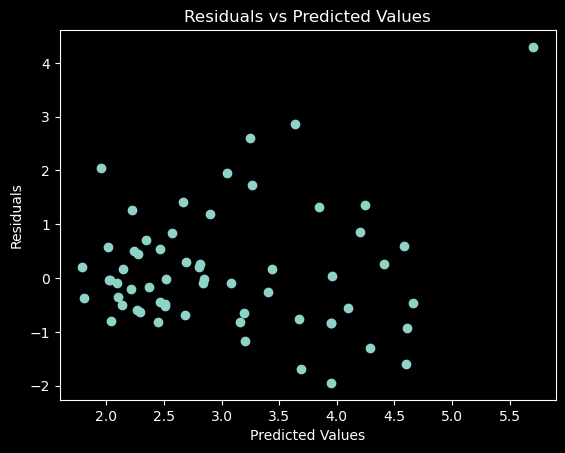

In [93]:
# as in 1, the below distribution does not show a pattern

import matplotlib.pyplot as plt

# Compute the residuals
residuals = y_test - y_pred

# Plot the residuals
plt.scatter(y_pred, residuals)
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Residuals vs Predicted Values')
plt.show()


# logistic regression

In [141]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

# Generate a synthetic binary classification dataset
X, y = make_classification(n_samples=100, n_features=2, n_informative=2, n_redundant=0, random_state=0)

# Split the dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Initialize a logistic regression model
model = LogisticRegression()

# Fit the model
model.fit(X_train, y_train)

# Predict the test set results
y_pred = model.predict(X_test)


Plotting this 2 feature dataset, where X is an array of lists, with y isn't possible. 

It is necessary to define x and y as `X[:, 0], y` to select the first and second feature/row.

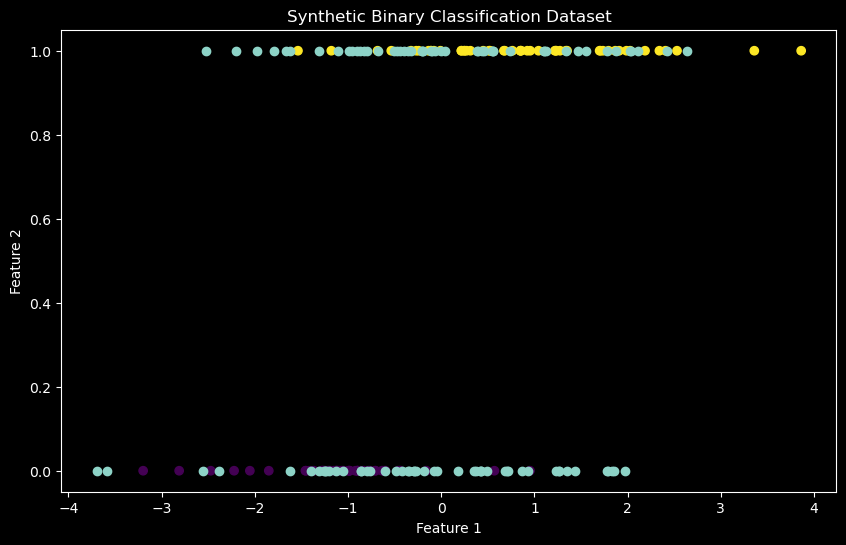

In [142]:
# Plot the data
plt.figure(figsize=(10, 6))
plt.scatter(X[:, 0], y, c=y, cmap='viridis')
plt.scatter(X[:, 1], y)
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Synthetic Binary Classification Dataset')
plt.show()


For plotting the "decision boundary" (the book goes on to explain this) for the example, chatgpt suggested `np.meshgrid` and `plt.contour` to plot the predicted against the actual values. 

In [149]:
y_test

array([1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1])

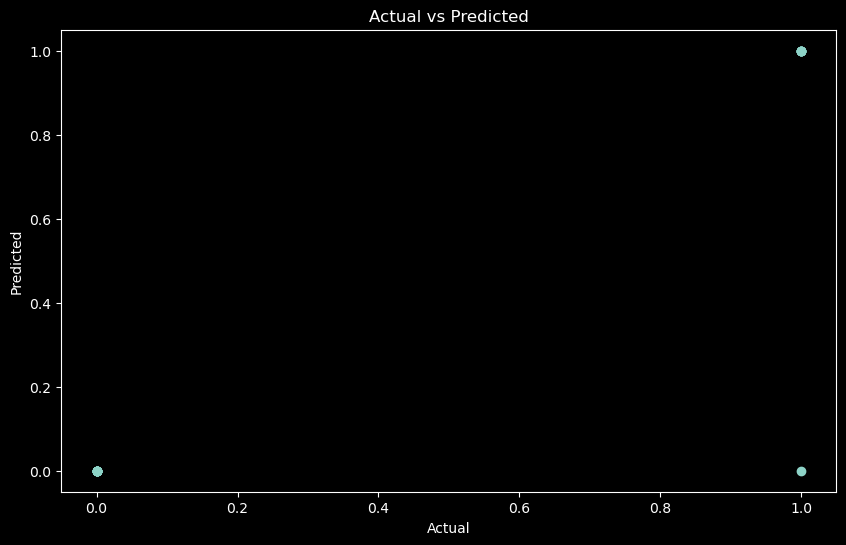

In [145]:
# Plot the actual vs predicted data
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs Predicted')
plt.show()


In [160]:
from scipy.special import expit as logistic

result = logistic(X_test @ model.coef_.T)

print(result)

[[7.83253619e-01]
 [9.74911873e-01]
 [7.25655242e-02]
 [1.54025478e-01]
 [2.57823133e-01]
 [2.59016283e-02]
 [1.87283771e-03]
 [1.29503021e-01]
 [1.33833610e-01]
 [9.53463216e-02]
 [8.12458093e-02]
 [9.61480902e-01]
 [2.82560755e-01]
 [9.44143538e-02]
 [2.02890487e-02]
 [9.76873981e-01]
 [9.91655330e-01]
 [8.10835685e-01]
 [2.22393427e-04]
 [3.72118643e-02]]


Text(0.5, 1.0, 'Logistic Regression Predicted vs. Actual')

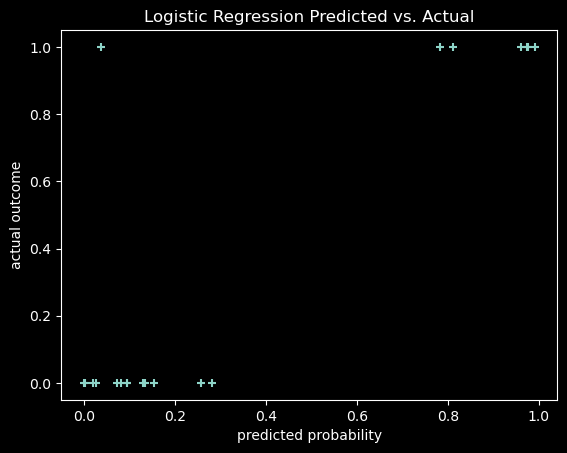

In [162]:
plt.scatter(result, y_test, marker='+')
plt.xlabel("predicted probability")
plt.ylabel("actual outcome")
plt.title("Logistic Regression Predicted vs. Actual")

ChatGtp explains it well:


In logistic regression, the model's prediction for a given input $x_i$ is given by the logistic function applied to the dot product of the model's coefficients $beta$ and the input $x_i$. The logistic function is defined as:

$$
f(x) = \frac{1}{1 + e^{-x}}
$$

So, for a given input \(x_i\), the model's prediction is:

$$
\hat{y}_i = f(\beta \cdot x_i) = \frac{1}{1 + e^{-\beta \cdot x_i}}
$$

This is what's being computed in the line `result = logistic(x_test @ beta.T)`. The `@` operator computes the dot product of `beta` and each row of `x_test`, and the `logistic` function applies the logistic function to these dot products.

The result is an array of the model's predictions for the inputs in `x_test`. Each prediction is a number between 0 and 1, representing the model's estimated probability that the corresponding input belongs to the positive class.

As for plotting, the code I provided doesn't include a plot. It only computes the model's predictions. If you want to plot the predictions, you could do so with a line plot or a scatter plot, depending on what you want to visualize. However, keep in mind that the predictions are probabilities, so they will all be between 0 and 1. If your `x_test` data is 2-dimensional, you might need to reduce it to 1 dimension to plot it against the predictions

In [165]:
from sklearn.metrics import confusion_matrix

# Compute the confusion matrix
cm = confusion_matrix(y_test, y_pred)
cm

array([[13,  0],
       [ 1,  6]], dtype=int64)

This corresponds to:
```
[[tn, fp],
 [fn, tp]]
 ```

# A bigger exercise

Generated in ChatGPT 

Sure, let's consider a real-world problem where logistic regression can be a good fit: predicting whether a customer will churn (i.e., stop doing business with a company).

**Problem**: Predicting customer churn is a common problem in many industries, especially in sectors like telecommunications, banking, or subscription-based online services. The goal is to identify customers who are likely to stop using a service or product in the near future, so that the company can take action to retain them.

**Data**: For this problem, we might have historical data about customers, including:

- Usage metrics (e.g., number of logins, activity level)
- Billing information (e.g., how much they pay, whether they have ever been late on a payment)
- Demographic information (e.g., age, location)
- Whether the customer churned (i.e., stopped using the service)

**Solution with Logistic Regression**:

1. **Data Preprocessing**: First, we would clean the data and handle any missing values. We might also create derived features that could be informative for the model, such as the customer's tenure (how long they have been a customer).

2. **Feature Selection**: We would select the features to include in the model. This could be based on domain knowledge, exploratory data analysis, or feature selection techniques like backward elimination or forward selection.

3. **Model Training**: We would split the data into a training set and a test set, and then train a logistic regression model on the training set. The target variable would be whether the customer churned, and the features would be the customer characteristics and usage metrics.

4. **Model Evaluation**: We would evaluate the model's performance on the test set. For a binary classification problem like this, we might use metrics like accuracy, precision, recall, the F1 score, or the area under the ROC curve.

5. **Interpretation**: One of the advantages of logistic regression is that it's interpretable. The coefficients of the logistic regression model can be interpreted as the change in the log-odds of the outcome for a one unit increase in the corresponding feature. This can provide insights into which factors are most influential in predicting customer churn.

6. **Prediction**: Finally, we would use the model to predict the probability of churn for each customer. We could then take action to try to retain the customers who are most likely to churn, such as sending them a special offer or reaching out to them directly.

This is a simplified example, and the actual process might involve additional steps and considerations, depending on the specifics of the problem and the data. But it gives a general idea of how logistic regression can be used to solve a real-world data science problem.

In [166]:
from sklearn.datasets import make_classification
import pandas as pd

# Generate a synthetic binary classification dataset
X, y = make_classification(n_samples=1000, n_features=20, n_informative=10, n_redundant=10, random_state=0)

# Convert to DataFrame for easier manipulation
df = pd.DataFrame(X, columns=[f'feature_{i+1}' for i in range(X.shape[1])])
df['churned'] = y

print(df.head())

   feature_1  feature_2  feature_3  feature_4  feature_5  feature_6  \
0  -1.094453  -1.012018  -2.704416   1.185746  -2.538972  -1.767851   
1  -1.387531  -0.222968   2.273550  -2.464543   1.164449  -0.772472   
2  -2.675931   0.194961  -0.024414  -3.685233  -0.026287  -1.107958   
3   2.628807  -2.590943  -2.629104  -9.123875   1.463144  -2.294797   
4  -1.180420  -0.578067   2.970436   5.396203  -2.683443  -0.045273   

   feature_7  feature_8  feature_9  feature_10  ...  feature_12  feature_13  \
0  -0.143746  -2.032323  -2.937346    0.776348  ...    0.952897    3.992089   
1   0.911496  -2.565257   2.174359   -0.413749  ...   -1.009477    1.915379   
2   1.443588  -0.568855   1.493023    0.986100  ...   -1.579700    0.827050   
3  -0.952095   0.644723   1.675660    4.990129  ...    2.933273   -6.879221   
4   2.316826   1.672438  -1.393094   -2.439792  ...   -4.079447    4.894963   

   feature_14  feature_15  feature_16  feature_17  feature_18  feature_19  \
0   -3.893211   -1.11

In this script, `make_classification` generates a synthetic binary classification dataset with 1000 samples, 20 features, and 2 classes. The `n_informative` parameter specifies the number of informative features, and the `n_redundant` parameter specifies the number of redundant features.

The generated data is then converted to a pandas DataFrame for easier manipulation. The DataFrame `df` represents our synthetic customer churn dataset, with the `churned` column indicating whether each customer churned.

This synthetic dataset doesn't have the same structure or meaning as a real-world customer churn dataset, but it can serve as a stand-in for demonstration purposes. In a real-world scenario, you would likely have to do more data preprocessing and feature engineering to prepare your data for modeling.

In [167]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report

# Split the dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(df.drop('churned', axis=1), df['churned'], test_size=0.2, random_state=0)

In [168]:
# Initialize a logistic regression model
model = LogisticRegression()

# Fit the model
model.fit(X_train, y_train)

LogisticRegression()

In [169]:
# Predict the test set results
y_pred = model.predict(X_test)

The `predict` method computes the dot product of the model's coefficients and the features of the test set, and applies the logistic function to these dot products to get the predicted probabilities. It then assigns each sample to the class with the highest predicted probability.

In [205]:
# Compute the confusion matrix
cm = confusion_matrix(y_test, y_pred)

print('Confusion Matrix:')
print(cm,' \n')

# Compute the classification report
cr = classification_report(y_test, y_pred)

print('Classification Report:')
print(cr)

Confusion Matrix:
[[78 26]
 [23 73]]  

Classification Report:
              precision    recall  f1-score   support

           0       0.77      0.75      0.76       104
           1       0.74      0.76      0.75        96

    accuracy                           0.76       200
   macro avg       0.75      0.76      0.75       200
weighted avg       0.76      0.76      0.76       200



The confusion matrix shows the number of true positives, false positives, true negatives, and false negatives. 

The **classification report** shows several metrics that summarize the model's performance, including precision, recall, f1-score, and support for each class, as well as the overall accuracy.

- precision = tp / (tp + fp)  in other words, the good *pos* predictions, divided by all the *pos* predictions, so it tells you "how much (proportionally) it got right".
- recall = tp / (tp + fn) in other words, recall adds the wrongly labeled negatives (therefore positives) to the denominator, so it divides true positives by all positives, telling you "how much it found". 
- f1-score = 2 * precision * recall / (precision + recall) in other words the harmonic mean of precision and recall.
- "support" refers to the number of actual occurrences of the class in the specified dataset.


confusion_matrix can also be displayed in Scikit-learn.

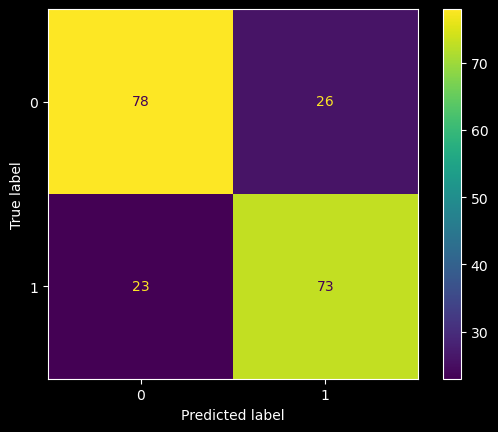

In [210]:
from sklearn.metrics import ConfusionMatrixDisplay

ConfusionMatrixDisplay(confusion_matrix=cm).plot()

# For further development

Ideally I would generate another one or two to get this workflow in, and also Naive Bayes and k-nearest neigbour.